# Lab 3 Classification Models & Model Evaluation

In [1]:
"""
Created on Thu Sep  01 15:40:00 2022

@author: konstantinoskalaitzidis
student_name =   "Konstantinos Kalaitzidis"
student_email =  "kon.kalaitzidis@gmail.com"

Notebook based on notes from Christian Kauth (UniFribourg) and Maria Bampa (DSV)
""" 

'\nCreated on Thu Sep  01 15:40:00 2022\n\n@author: konstantinoskalaitzidis\nstudent_name =   "Konstantinos Kalaitzidis"\nstudent_email =  "kon.kalaitzidis@gmail.com"\n\nNotebook based on notes from Christian Kauth (UniFribourg) and Maria Bampa (DSV)\n'

## This is the 3rd and 4th lab exercise of the Data Science for Health Informatics (DSHI) module of Stockholm University (2022). 

## Importing Packages and Libraries

In [2]:
# Import the package with an alias
# Numeric analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from pandas import DataFrame

In [3]:
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 3456
np.random.seed(RANDOM_SEED)

## Introductory information:
Applying 3 classification models on our dataset that perform on 2 selected features.

# Data Preparation

In [4]:
# read pickle file as dataframe
pkl_path = "/Users/konstantinoskalaitzidis/Desktop/DSHI/Data-Analysis/data/raw/avocado.pkl"
df = pd.read_pickle(pkl_path)

In [5]:
# What is the total size of the dataset?
df.shape

(18249, 14)

In [6]:
# Which are the variable types?
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
# Lets take a look at the first three rows of our dataset
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [8]:
# Lets take a look at three random rows of our dataset
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3305,29,2016-06-05,0.85,310345.06,4642.74,174172.12,23750.21,107779.99,19176.89,81916.42,6686.68,conventional,2016,CincinnatiDayton
2041,13,2015-09-27,1.01,109274.98,44983.72,44626.23,84.32,19580.71,19577.65,0.00,3.06,conventional,2015,Roanoke
4917,29,2016-06-05,1.17,521408.99,169293.85,269555.77,25618.94,56940.43,56921.44,18.99,0.00,conventional,2016,Sacramento


In [9]:
# Lets have a look at the last three rows of our dataset
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
# Lets read some information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# Checking for missing data
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

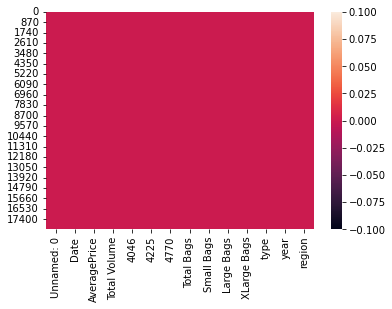

In [13]:
# Another way to verify that no null data is present in the dataframe is to check if the red 
# color in the plot is distributed equally according to each colunm.'''
sns.heatmap(df.isnull())

Great. No missing values. 

## Pre-processing

In [14]:
# Deleting irrelevant features
columns_to_delete = ["Unnamed: 0"]

# axis=1 means that the operation is executed in the columns, axis=0 is in the rows
df = df.drop(columns_to_delete, axis=1)    

In [15]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
df.shape

(18249, 13)

In [17]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [18]:
# We need to change the Date from an Object type to a Date type
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [20]:
# we also need to change the data types of "type" and "region" and make them categorical. 
df["type"] = df["type"].astype("category")
df["region"] = df["region"].astype("category")
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                  category
year                     int64
region                category
Month                    int64
Day                      int64
dtype: object

In [21]:
# Describes the numerical variables
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


## Store processed data

In [22]:
import os

this_path = "/Users/konstantinoskalaitzidis/Desktop/DSHI/Data-Analysis/data"
folder_name = "processed"
data_folder = os.path.join(this_path, folder_name)
os.makedirs(data_folder, exist_ok=True) # Check if the folder exists
data_folder

'/Users/konstantinoskalaitzidis/Desktop/DSHI/Data-Analysis/data/processed'

In [23]:
file_name = "avocado_processed_lab3.csv"
filepath = os.path.join(data_folder, file_name)
filepath

'/Users/konstantinoskalaitzidis/Desktop/DSHI/Data-Analysis/data/processed/avocado_processed_lab3.csv'

In [24]:
df.to_csv(filepath, index=False)

## Data Visualization

/Users/konstantinoskalaitzidis/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice'>

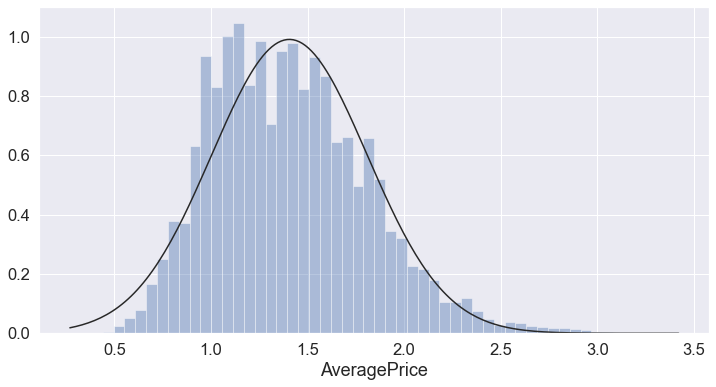

In [25]:
# What is the representatitve average price range?
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

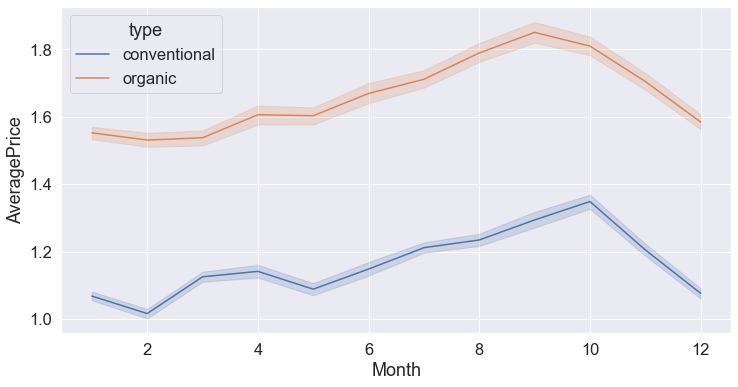

In [26]:
# Average price distribution between conventional and oranic avocados. 
plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Text(0.5, 1.0, 'Average Price')

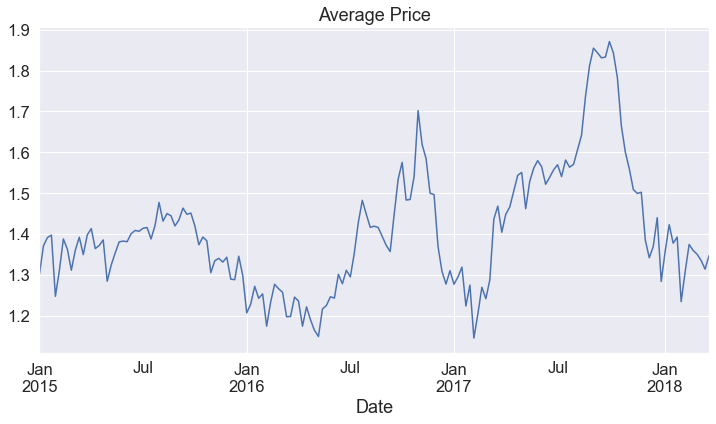

In [27]:
# Average price distribution over date
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,6))
byDate['AveragePrice'].plot()
plt.title('Average Price')

### Correlations

In [28]:
correlations = df.corr(method="pearson")
correlations

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


## Feature Engineering

In [29]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                  category
year                     int64
region                category
Month                    int64
Day                      int64
dtype: object

In [30]:
# Deleting irrelevant features
columns_to_delete = ["Date", "region"]

# axis=1 means that the operation is executed in the columns, axis=0 is in the rows
df = df.drop(columns_to_delete, axis=1)    

In [31]:
df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13


### One-hot Encoding

For categorical values "type" we apply what is called **one-hot encoding**, when each possible value in the categorical feature is transformed into a column and populated with 1s and 0s.

In [32]:
# This function transforms a categorical feature into one-hot encoding
pd.get_dummies(df["type"])

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
18244,0,1
18245,0,1
18246,0,1
18247,0,1


In [33]:
## Replace the column in the dataframe 
# Add the new columns after one-hot encoding
oh_encoding = pd.get_dummies(df["type"])
df = pd.concat([df, oh_encoding], axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,2,4,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,1,28,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,1,21,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,1,14,0,1


In [34]:
df.dtypes

AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type            category
year               int64
Month              int64
Day                int64
conventional       uint8
organic            uint8
dtype: object

<AxesSubplot:>

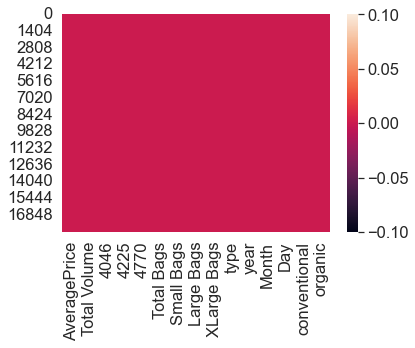

In [35]:
sns.heatmap(df.isnull())

In [36]:
df["type"] = df["type"].map({
                "conventional":0, 
                "organic":1
            })
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14,0,1


## Normalization & Standarization

In [37]:
# Since the dataset has more than 200 rows I need to find a sample of it which I will use.
df = df.sample(200)

In [38]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,conventional,organic
3228,1.10,581638.75,151462.15,291205.61,81651.23,57319.76,56501.53,797.78,20.45,0,2016,11,27,1,0
1908,0.99,610658.64,144514.60,337188.30,13456.08,115499.66,114658.35,690.46,150.85,0,2015,4,19,1,0
13832,1.23,49843.09,7923.86,26690.89,18.50,15209.84,1979.12,13230.72,0.00,1,2016,6,19,0,1
13431,1.86,41547.14,8104.10,16993.79,2071.16,14378.09,9996.91,4381.18,0.00,1,2016,3,6,0,1
10717,1.88,7515.96,5.95,677.58,0.00,6832.43,6832.43,0.00,0.00,1,2015,5,24,0,1


In [39]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,conventional,organic
3228,1.10,581638.75,151462.15,291205.61,81651.23,57319.76,56501.53,797.78,20.45,0,2016,11,27,1,0
1908,0.99,610658.64,144514.60,337188.30,13456.08,115499.66,114658.35,690.46,150.85,0,2015,4,19,1,0
13832,1.23,49843.09,7923.86,26690.89,18.50,15209.84,1979.12,13230.72,0.00,1,2016,6,19,0,1
13431,1.86,41547.14,8104.10,16993.79,2071.16,14378.09,9996.91,4381.18,0.00,1,2016,3,6,0,1
10717,1.88,7515.96,5.95,677.58,0.00,6832.43,6832.43,0.00,0.00,1,2015,5,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,0.67,1171871.64,624947.16,260052.13,14748.58,272123.77,126572.67,145260.82,290.28,0,2017,2,19,1,0
11721,1.65,1285.09,3.72,111.53,0.00,1169.84,1169.84,0.00,0.00,1,2015,2,1,0,1
16300,1.74,214612.36,5868.80,30074.75,259.43,178409.38,153830.81,24578.57,0.00,1,2017,7,30,0,1
17696,1.08,28741.11,22.16,6254.59,225.17,22239.19,22132.06,107.13,0.00,1,2018,1,7,0,1


# Classification Models

We have chosen 2 numerical features that are relatable to the target variable that we intend to predict. We are only training datasets with two features to simplify the visualization of the decision boundaries.

In [40]:
df_new = pd.DataFrame({
                        "x1": df.iloc[:, 0],
                        "x2": df.iloc[:, 5],
                        "class": df.iloc[:, 9]
                        })
df_new.sample(10)

,x1,x2,class
1237,1.21,16983.09,0
9398,1.55,3240.12,1
11319,1.94,15.98,1
3023,1.62,73979.06,0
9472,1.48,13339.71,1
10482,1.21,2180.43,1
9599,1.36,767.09,1
5873,1.31,96599.45,0
12611,0.89,11617.99,1
6157,1.71,45123.73,0


Filtering the original dataset to create two arrays that contain only feature matrix ( 𝑋 ) and target label array ( 𝑦 ).

In [41]:
X = df_new.iloc[:,:2] # features x1 and x2
y = df_new.iloc[:, 2]

In [42]:
X

,x1,x2
3228,1.10,57319.76
1908,0.99,115499.66
13832,1.23,15209.84
13431,1.86,14378.09
10717,1.88,6832.43
...,...,...
7410,0.67,272123.77
11721,1.65,1169.84
16300,1.74,178409.38
17696,1.08,22239.19


In [43]:
y 

3228     0
1908     0
13832    1
13431    1
10717    1
        ..
7410     0
11721    1
16300    1
17696    1
3023     0
Name: class, Length: 200, dtype: category
Categories (2, int64): [0, 1]

In [44]:
X.shape

(200, 2)

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
y.shape

(200,)

In [47]:
type(y)

pandas.core.series.Series

In [48]:
# Let's create a function to see the dataset easier
def visualize_dataset_with_target_class(X, y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The features from the data
        y: (np.array[N,1]) - The corresponding target class of each sample
    Returns:
        A plot with the dataset and the colors of the respective class
    """
    c = np.where(y==0,'#003f5c','-')
    c[y==1] = '#ff764a'
    plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], marker = 'o', c=c, cmap='Blues', s=30)
    plt.xlabel("Average Price")
    plt.ylabel("Total bags")
    plt.title(title)
    plt.grid(True)
    return plt.show()



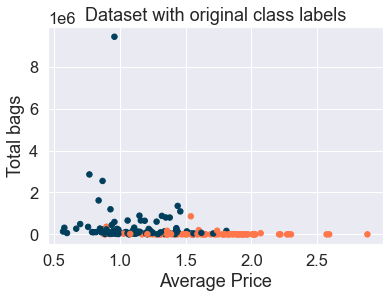

In [49]:
visualize_dataset_with_target_class(X, y, title="Dataset with original class labels")

## Train-test partitioning

Perform train-test split with a proportion of 80%/20%.
We want our target variable to not be continuous e.g. average price. 
Synthetic data is in X variable
y label to train the model
class = type
X1 = average price
X2 = total volume

X and y must have the same shape

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

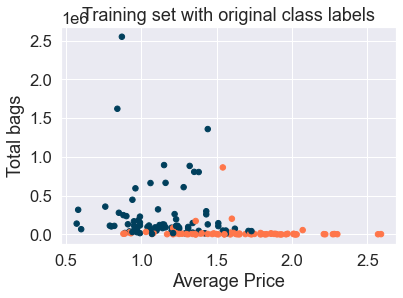

In [51]:
# Plot the TRAINING set
visualize_dataset_with_target_class(X_train, y_train, title="Training set with original class labels")

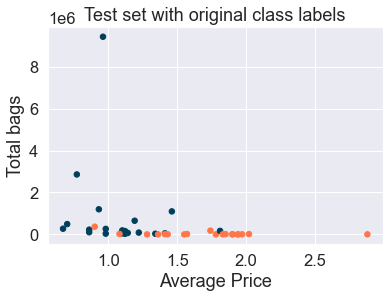

In [52]:
# Plot the TEST set 
visualize_dataset_with_target_class(X_test, y_test, title="Test set with original class labels")

## Decision Tree (DT)

We will train three classifiers on our small dataset: A decision tree (DT), a random forest (RF), and a K-nearest neighbors (KNN)

In [53]:
import time

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Here, we start our counter
t_start = time.time()

# Recall from the previous lab that these are the traditional three steps for most sklearn models.

# 1) Initialize an object containing the algorithm
dt_classifier = DecisionTreeClassifier(max_depth=6)     # Criterion split by default is gini-index, which is ok

# 2) Apply the algorithm using the training data
dt_classifier.fit(X_train, y_train)   ### NOTE here that we also used the labels `y`, in clustering algorithms we only pass `X`

# 3) Generate class labels for new unseen data (predictions)
y_predicted = dt_classifier.predict(X_test)

print("According to the DT classifier, the class labels in the test set are: ", y_predicted)
# At the end we calculate the end time
t_end = time.time()
t_elapsed = t_end - t_start

print(f"The elapsed time of the function is {t_elapsed} seconds")

According to the DT classifier, the class labels in the test set are:  [0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1]
The elapsed time of the function is 0.012845754623413086 seconds


In [56]:
# Let's create a function to visualize the true labels and predicted labels easier
def visualize_and_compare_classifications(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
        
    # First plot contains real class labels
    c = np.where(real_y==0,'#003f5c','-')
    c[real_y==1] = '#ff764a'
    
    ax = axes[0]
    ax.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c=c, s=80)
    ax.set(xlabel="Average Price",ylabel="Total Volume",title="Real labels")
    ax.grid(True)

    # Second plot contains predicted class labels
    c = np.where(predicted_y==0,'#003f5c','-')
    c[predicted_y==1] = '#ff764a'
    
    ax = axes[1]
    ax.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c=c, s=80)
    ax.set(xlabel="Average Price",ylabel="Total Volume",title="Predicted labels")
    ax.grid(True)

    if title != "":
        plt.suptitle(title)

    return plt.show()



Classification results

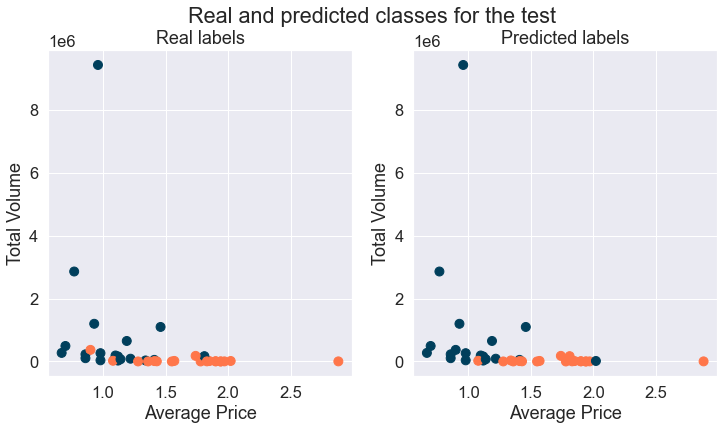

In [57]:
visualize_and_compare_classifications(X_test, y_test, y_predicted, title="Real and predicted classes for the test")

## Plotting decision trees

[Text(171.3857142857143, 201.90857142857143, 'X[1] <= 27283.78\ngini = 0.499\nsamples = 160\nvalue = [84, 76]'),
 Text(63.77142857142857, 170.84571428571428, 'X[1] <= 15472.07\ngini = 0.202\nsamples = 79\nvalue = [9, 70]'),
 Text(31.885714285714286, 139.78285714285715, 'X[1] <= 6495.9\ngini = 0.088\nsamples = 65\nvalue = [3, 62]'),
 Text(15.942857142857143, 108.72, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(47.82857142857143, 108.72, 'X[1] <= 6672.14\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(31.885714285714286, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(63.77142857142857, 77.65714285714284, 'X[0] <= 1.59\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(47.82857142857143, 46.59428571428572, 'X[0] <= 1.52\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(31.885714285714286, 15.531428571428563, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(63.77142857142857, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Tex

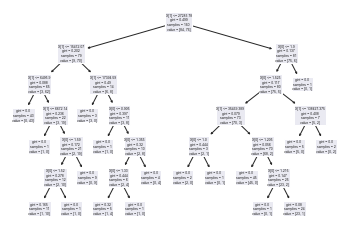

In [58]:
# Sklearn also has functions to visualize the Decision Tree
from sklearn.tree import plot_tree
plot_tree(dt_classifier.fit(X_train, y_train))

## Random Forest (RF)

In [59]:
from sklearn.ensemble import RandomForestClassifier
t_start = time.time()

rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_predicted = rf_classifier.predict(X_test)

print("According to the RF classifier, the class labels in the test set are: ", y_predicted)

# At the end we calculate the end time
t_end = time.time()
t_elapsed = t_end - t_start

print(f"The elapsed time of the function is {t_elapsed} seconds")

According to the RF classifier, the class labels in the test set are:  [0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 0 0 1]
The elapsed time of the function is 0.02316117286682129 seconds


Classification results

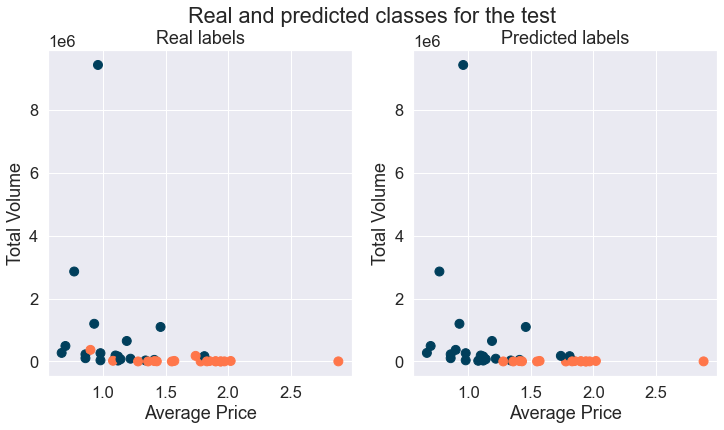

In [60]:
visualize_and_compare_classifications(X_test, y_test, y_predicted, title="Real and predicted classes for the test")

## K-nearest neighbors (KNN)

In [61]:
# Normalize the data for KNN

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X_train = scaler.fit_transform(X_train)
norm_X_test  = scaler.fit_transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

t_start = time.time()


knn_classifier = KNeighborsClassifier(n_neighbors=1)    # The default distance metric is Euclidean, which is usually ok.
knn_classifier.fit(norm_X_train, y_train)
y_predicted = knn_classifier.predict(norm_X_test)

# At the end we calculate the end time
t_end = time.time()
t_elapsed = t_end - t_start

print(f"The elapsed time of the function is {t_elapsed} seconds")

The elapsed time of the function is 0.00960683822631836 seconds


In [63]:
# Let's create a function to visualize the true labels and predicted labels easier
def visualize_and_compare_classifications_version2(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    # First plot contains real class labels
    c = np.where(real_y==0,'#003f5c','-')
    c[real_y==1] = '#ff764a'
    
    ax = axes[0]
    ax.scatter(x = X[:,0], y = X[:,1], c=c, s=80)
    ax.set(xlabel="Average Price",ylabel="Total Volume",title="Real labels")
    ax.grid(True)

    # Second plot contains predicted class labels
    c = np.where(predicted_y==0,'#003f5c','-')
    c[predicted_y==1] = '#ff764a'
    
    ax = axes[1]
    ax.scatter(x = X[:,0], y = X[:,1], c=c, s=80)
    ax.set(xlabel="Average Price",ylabel="Total Volume",title="Predicted labels")
    ax.grid(True)

    if title is not "":
        plt.suptitle(title)

    return plt.show()




<>:32: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:32: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xj/qm67gxf118j1hry5jjcn94540000gn/T/ipykernel_11600/462797833.py:32: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if title is not "":


Classification results

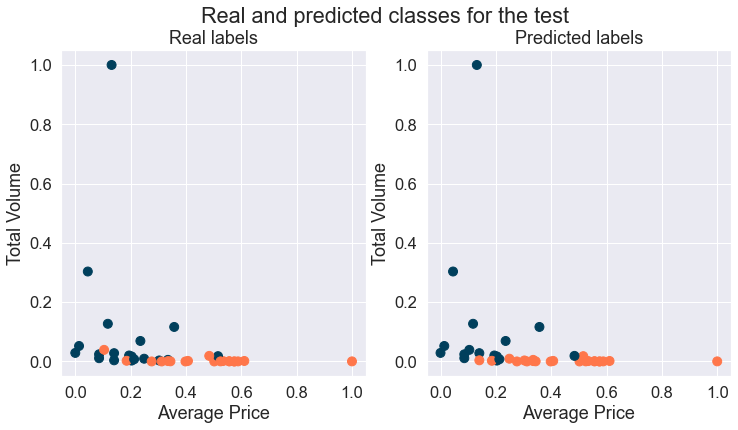

In [64]:
visualize_and_compare_classifications_version2(norm_X_test, y_test, y_predicted, title="Real and predicted classes for the test")

## Analysis

We applied 3 classification models on our dataset that performed on the 2-features that we selected. For each classifier, we showed a plot of the predicted classification.

There is a noticeable difference between the performance of the
KNN classifier compared to the RF and DT. The KNN classifier is much faster whereas the
RF and DT are closer to each other, performance-wise. For the features, we chose Average
Price and Total Volume and created an X variable that contains both so I can feed them into
the classifiers. In place for y, we used the “type” target variable (organic or conventional)
which takes numerical values (0 or 1 respectively) and has been previously one-hot encoded.

When looking at the plots, we can clearly see an outlier which can be removed
in future work. Other than that, the plots look very similar to each other with minor
differences in the labels between the Real and Predicted labels plots in DT, RF, and KNN
classifiers. The data points featured are 200 rows sampled from the more than 18000 rows of
the initial dataset.


# Continuation of Lab 3 - Lab 4

## Organizing data types

In [65]:
# lets create a new dataframe with 3 or more features (+ y)

# Lets see the previous dataframe again to select new features to include
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,conventional,organic
3228,1.10,581638.75,151462.15,291205.61,81651.23,57319.76,56501.53,797.78,20.45,0,2016,11,27,1,0
1908,0.99,610658.64,144514.60,337188.30,13456.08,115499.66,114658.35,690.46,150.85,0,2015,4,19,1,0
13832,1.23,49843.09,7923.86,26690.89,18.50,15209.84,1979.12,13230.72,0.00,1,2016,6,19,0,1
13431,1.86,41547.14,8104.10,16993.79,2071.16,14378.09,9996.91,4381.18,0.00,1,2016,3,6,0,1
10717,1.88,7515.96,5.95,677.58,0.00,6832.43,6832.43,0.00,0.00,1,2015,5,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,0.67,1171871.64,624947.16,260052.13,14748.58,272123.77,126572.67,145260.82,290.28,0,2017,2,19,1,0
11721,1.65,1285.09,3.72,111.53,0.00,1169.84,1169.84,0.00,0.00,1,2015,2,1,0,1
16300,1.74,214612.36,5868.80,30074.75,259.43,178409.38,153830.81,24578.57,0.00,1,2017,7,30,0,1
17696,1.08,28741.11,22.16,6254.59,225.17,22239.19,22132.06,107.13,0.00,1,2018,1,7,0,1


In [66]:
# lets add the "Total Bags" feature
df_lab4 = pd.DataFrame({
                        "x1": df.iloc[:, 0],
                        "x2": df.iloc[:, 1],
                        "x3": df.iloc[:, 5], # new feature
                        "y": df.iloc[:, 9] # class
                        })
df_lab4.head()

,x1,x2,x3,y
3228,1.10,581638.75,57319.76,0
1908,0.99,610658.64,115499.66,0
13832,1.23,49843.09,15209.84,1
13431,1.86,41547.14,14378.09,1
10717,1.88,7515.96,6832.43,1


In [67]:
# Now we have a new dataframe with 3 features and a target variable to run the classification task

In [68]:
df_lab4.dtypes

x1     float64
x2     float64
x3     float64
y     category
dtype: object

In [69]:
# class is category and has numerical data. 

In [70]:
print("List of values in the feature 'class':", df_lab4["y"].unique(), "and dtype=",df_lab4["y"].dtypes)

List of values in the feature 'class': [0, 1]
Categories (2, int64): [0, 1] and dtype= category


## Handling Missing Values and Filtering data

In [71]:
# Check if there are missing values
df_lab4.isnull().sum()

x1    0
x2    0
x3    0
y     0
dtype: int64

In [72]:
df_lab4.describe(include="all")

,x1,x2,x3,y
count,200.000000,2.000000e+02,2.000000e+02,200.0
unique,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,105.0
mean,1.368600,6.917951e+05,1.993045e+05,NaN
std,0.412384,2.379104e+06,7.456621e+05,NaN
min,0.570000,7.124000e+02,1.598000e+01,NaN
25%,1.070000,1.441217e+04,6.369462e+03,NaN
50%,1.310000,1.085481e+05,3.259096e+04,NaN
75%,1.622500,5.250126e+05,1.230930e+05,NaN


In [73]:
df_lab4.value_counts()

x1    x2          x3          y
0.57  1290021.19  139458.75   0    1
1.55  2738.24     2631.39     1    1
1.44  3378088.25  1358387.54  0    1
1.46  5188483.10  1097188.19  0    1
1.47  5043.15     4876.78     1    1
                                  ..
1.15  3780455.44  894348.37   0    1
1.16  822522.24   91609.12    0    1
      2766391.11  665006.77   0    1
1.17  3329.28     3286.67     1    1
2.88  18687.22    3202.21     1    1
Length: 200, dtype: int64

In [74]:
df_lab4.shape

(200, 4)

<AxesSubplot:>

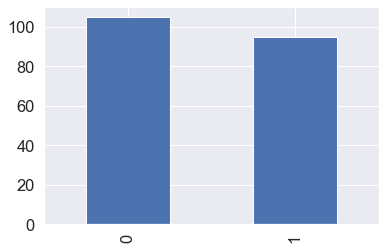

In [75]:
df_lab4["y"].value_counts().plot.bar()

In [76]:
# Data to be used for the classification task
df_lab4.sample(10)

,x1,x2,x3,y
16281,1.60,251595.19,202875.69,1
11319,1.94,19311.21,15.98,1
268,1.23,118541.11,54298.62,0
4686,1.22,487762.79,262247.96,0
16512,1.90,10625.79,4827.03,1
4771,1.14,260487.14,71145.81,0
15329,1.65,15521.50,11709.92,1
17993,1.61,28257.18,20649.88,1
9472,1.48,119059.56,13339.71,1
17747,1.59,31590.90,23865.57,1


## Preparing dataframes for Classification Tasks

In [77]:
# Transform the pandas DataFrame into numerical Numpy arrays, 
# so that they can be processed by the packages in sklearn

In [78]:
# convert all types to int
df_lab4 = df_lab4.astype(int)

In [79]:
df_lab4.dtypes

x1    int64
x2    int64
x3    int64
y     int64
dtype: object

In [80]:
df_lab4.head()

,x1,x2,x3,y
3228,1,581638,57319,0
1908,0,610658,115499,0
13832,1,49843,15209,1
13431,1,41547,14378,1
10717,1,7515,6832,1


In [81]:
# Separate the features X and the target variable y
df_X = df_lab4.drop(["y"], axis=1)
df_y = df_lab4["y"]

In [82]:
# Finally, we need transform from Pandas DataFrame to numerical Arrays, and store the column names
df_X = df_X.values
df_y = df_y.values

df_colnames = df_lab4.columns.values
print(df_colnames)

['x1' 'x2' 'x3' 'y']


In [83]:
type(df_X)
type(df_y)

numpy.ndarray

## Evaluation metrics

### Single train-test split

In [84]:
from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state=RANDOM_SEED)

In [85]:
from sklearn.metrics import confusion_matrix

cm_results = confusion_matrix(y_test, y_predicted)
cm_results

array([[16,  5],
       [ 2, 17]])

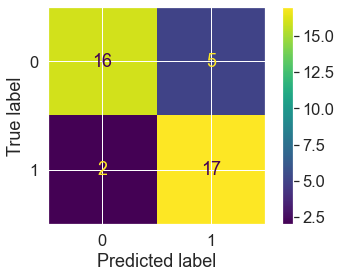

In [86]:
# Visual representation of the same Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm_results).plot()

In [87]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
CV_indices = kf.split(df_X, df_y)

In [88]:
for train_index, test_index in CV_indices:
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)

TRAIN: (160,) TEST: (40,)
TRAIN: (160,) TEST: (40,)
TRAIN: (160,) TEST: (40,)
TRAIN: (160,) TEST: (40,)
TRAIN: (160,) TEST: (40,)


In [89]:
from sklearn.model_selection import cross_validate

## Experimental evaluation of best performance

In [90]:
# We will apply the classifiers on the normalized dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_X_norm = scaler.fit_transform(df_X)

print(f"data_X min. value: {df_X_norm.min()}, max. value: {df_X_norm.max()}")

data_X min. value: 0.0, max. value: 1.0


In [91]:
# Apply my own version

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

MODELS_TO_TEST = {
    "RF_10": RandomForestClassifier(n_estimators=5, max_depth=10),
    "DT" :  DecisionTreeClassifier(max_depth=10),
    "KNN" : KNeighborsClassifier(n_neighbors=2)
}

# Define the number of splits 
NUMBER_OF_SPLITS = 10

# Scoring metrics
SCORING_METRICS = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Create empty DataFrame to populate  the name of the classifier and the six values returned from `cross_validate()`
results_evaluation = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    })

In [93]:
#### ITERATION FOR THE EXPERIMENT

for name, classifier in MODELS_TO_TEST.items():
    
    print(f"Currently training the classifier {name}.")

    # Get the evaluation metrics per fold after cross-validation
    # Note that we are passing the normalized array `df_X_norm` to all classifiers
    scores_cv = cross_validate(classifier, df_X_norm, df_y, cv=NUMBER_OF_SPLITS, scoring=SCORING_METRICS)

    # Average the scores among folds
    dict_this_result = {
                    "classifier_name":[name],
                    }
    # Populate the dictionary with the results of the cross-validation
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [ scores_cv[metric_name].mean() ]

    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame(dict_this_result)

    # Append to the main dataframe with the results 
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

Currently training the classifier RF_10.
Currently training the classifier DT.
Currently training the classifier KNN.
The experimental setup has finished


In [94]:
results_evaluation

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,RF_10,0.019140,0.009269,0.925,0.931445,0.922121,0.923515
1,DT,0.000964,0.003733,0.930,0.934434,0.927677,0.928700
2,KNN,0.001013,0.006205,0.945,0.952670,0.942222,0.943695


## Visualizations

In [95]:
# Store the file in the indicated path
file_name = "results_timing.csv"
results_evaluation.to_csv(file_name, index=False)

In [96]:
# training time (fit_time) and prediction time (score_time)

### Which was the fastest/slowest algorithm

In [97]:
average_time_classifier = results_evaluation.groupby(by=["classifier_name"]).mean()
average_time_classifier.drop(["test_accuracy", "test_precision_macro", "test_recall_macro", "test_f1_macro"],axis=1,inplace=True) # Delete unnecessary features
average_time_classifier["total_time"] = average_time_classifier["fit_time"] + average_time_classifier["score_time"] # Create new features
average_time_classifier

,fit_time,score_time,total_time
classifier_name,,,
DT,0.000964,0.003733,0.004697
KNN,0.001013,0.006205,0.007218
RF_10,0.019140,0.009269,0.028409


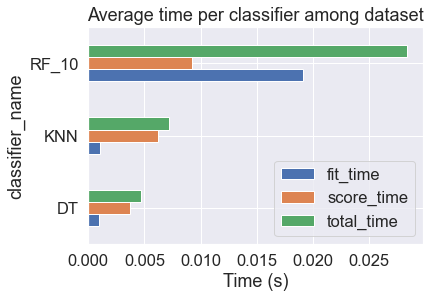

In [98]:
average_time_classifier.plot.barh()
plt.title("Average time per classifier among dataset")
plt.xlabel("Time (s)")
plt.show()

RF slowest. DT fastest. 

### Which classification model seems to perform better in your data? Would you deploy it in a real-life task? Why or why not?  

The classification model that performs better on my data is the Decision Tree (DT) classifier. It is faster than the KNN classifier and performs almost 70% better than the Random Forest classifier (which is also the worst-performing classifer).  
In this case I could employ the KNN classifier because the difference in performance compared to DT isn't that great and KNN performs adequate in small datasets such as this one. For much larger ones I would prefer to use DT compared to KNN due to KNN's large computational cost.  
Generally, DT is faster than KNN but DT can be prone to outliers. If total time was irrelevant, and the aim was quality of results, Random Forest would be my personal choice as it is a more robust and accurate version of DT that isn't prone to overfitting.  
Important to note is whether the y is consisted of continuous or discrete variables as this changes which classifier is more ideal. In our case the y target variable is consisted of discrete variables and as a result I would choose the DT classifier for a similar real-life task. 

### Which has the best F1 score?

In [99]:
accuracy_classifier = results_evaluation.groupby(by=["classifier_name"]).mean()
accuracy_classifier.drop(["test_accuracy", "fit_time", "score_time", "test_precision_macro", "test_recall_macro"],axis=1,inplace=True) # Delete unnecessary features
#accuracy_classifier["total_time"] = average_time_classifier["fit_time"] + average_time_classifier["score_time"] # Create new features
accuracy_classifier

,test_f1_macro
classifier_name,
DT,0.928700
KNN,0.943695
RF_10,0.923515


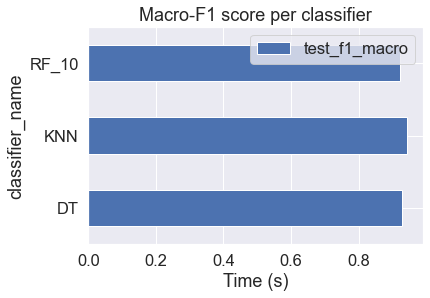

In [100]:
accuracy_classifier.plot.barh()
plt.title("Macro-F1 score per classifier")
plt.xlabel("Time (s)")
plt.show()

The F1 score is a good measure of evaluating model performance. The KNN classifier has performed the best (note that in terms of execution time, KNN perform the worst out of all three classifiers).

## Final Reflection

So far you chose a handful of classifiers with predefined hyperparameters. Describe briefly how do you think you can determine experimentally which hyperparameter performs better for a given classifier? 

Chosing which hyperparameters to tune can directly affect the performance of a classifier and metrics such as accuracy and the F1 score. It is important to have a close look at the numerical analysis or the "results_evaluation" table after each change of the hyperparamaters and then reflect on whether the score has been improved or not. Visualizations on the results table can help us see if the changes made have affected positively or negatively the performance of the classifiers.  
If there are mutliple dimensions or many features in our dataset it is more appropriate to consider the numerical analysis of the results_evaluation table to determine areas of improvement and potential tuning of hyperparameters.